In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

6.4.1  Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

In [2]:
transition = pd.read_csv('/home/jupyter-l.fedoseeva-12/Lesson_5/Miniproject/transaction_data.csv')

In [19]:
transition.head(5)

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [7]:
transition.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:35:03,Masha_Ozerova,successfull
freq,6,112,3692


In [8]:
transition.isna().sum()

date           0
name           0
transaction    0
dtype: int64

6.4.2  Проверьте, какие значения принимает колонка transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.

In [16]:
transition.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [28]:
transaction_count = transition.transaction.value_counts()

In [29]:
transaction_count

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

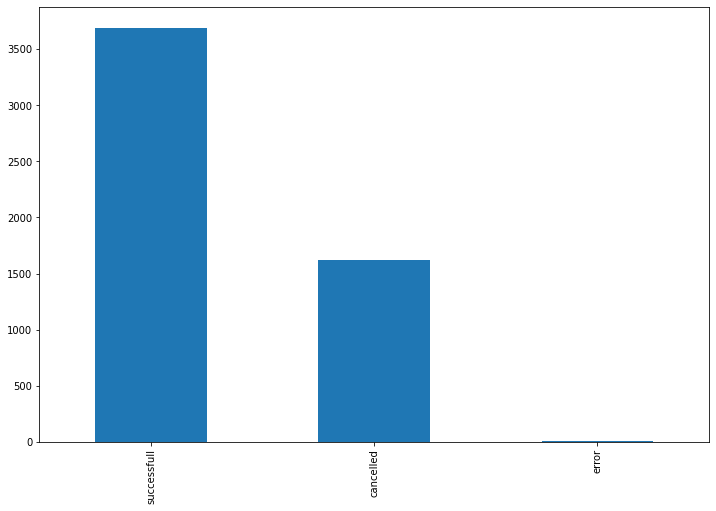

In [43]:
transaction_count.plot.bar()

In [ ]:
#  второй вариант
#  sns.barplot(x=transaction_count.index, y=transaction_count.value_counts())

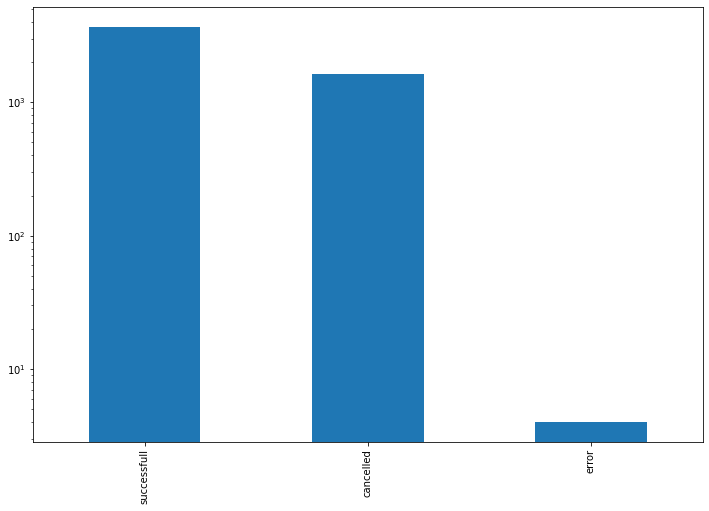

In [44]:
transaction_count.plot.bar(logy=True)

6.4.3    Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull

Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где

по оси x – число транзакций
по оси y – доля пользователей с таким числом транзакций
Выберите верные утверждения.

In [50]:
transition_successfull = transition.query('transaction == "successfull"') \
            .groupby('name',as_index=False) \
            .agg({'transaction': 'count'}) \
            .rename(columns={'transaction':'count_trans'})

In [56]:
transition_successfull.head(5)

,name,count_trans
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


In [51]:
transition_successfull.describe()

,count_trans
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


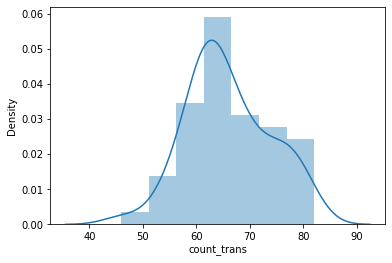

In [54]:
sns.distplot(transition_successfull.count_trans)

6.4.4   К вам пришёл коллега с немного обновленными данными

Постройте сводную таблицу user_vs_minute_pivot, где

столбцы – имена пользователей
строки – минута времени осуществления операции (minute)
значения – число совершённых операций
Пропущенные значения заполните нулями.

In [3]:
transition_update = pd.read_csv('/home/jupyter-l.fedoseeva-12/Lesson_5/Miniproject/transaction_data_updated.csv')

In [20]:
transition_update.dtypes

date           object
name           object
transaction    object
minute          int64
dtype: object

In [21]:
transition_update.date = pd.to_datetime(transition_update.date)
transition_update['minute'] = transition_update.date.dt.minute

In [22]:
transition_update.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [23]:
transition_update_by_minute = transition_update.groupby(['name', 'minute'],as_index=False) \
            .agg({'transaction': 'count'}) \
            .rename(columns={'transaction':'count_trans'})

In [24]:
transition_update_by_minute

,name,minute,count_trans
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3
...,...,...,...
2573,Vasilisa_Smirnova,52,1
2574,Vasilisa_Smirnova,53,1
2575,Vasilisa_Smirnova,54,2
2576,Vasilisa_Smirnova,56,3


In [31]:
user_vs_minute_pivot = transition_update_by_minute.pivot(index='minute', columns='name', values='count_trans').reset_index()
user_vs_minute_pivot.fillna(0, inplace=True)

In [32]:
user_vs_minute_pivot.head()

name,minute,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
0,0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


6.4.5   Коллега построил следующий график по сводной таблице из предыдущего шага, и сомневается, что в данных нет ошибки. 

по оси x – минута транзакции (сколько минут прошло с начала дня)
по оси y – число транзакций

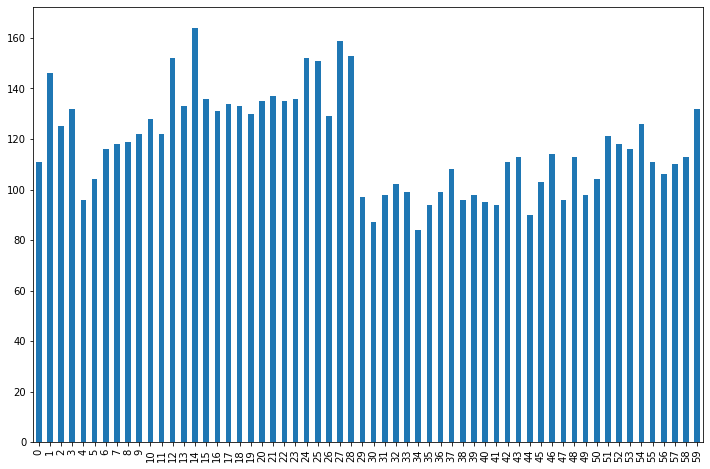

In [54]:
plt.figure(figsize=(12, 8))
user_vs_minute_pivot.sum(axis=1).plot.bar()

6.4.6   Исправьте ошибку коллеги (если она есть 😉), и посчитайте число минут, прошедших с начала дня. Результат сохраните в колонку true_minute. Постройте график, как в предыдущем стэпе, и посмотрите, произошли ли изменения (график в код включать не нужно).

In [55]:
transition_update.date.head()

0   2020-03-02 00:37:20
1   2020-03-02 00:59:09
2   2020-03-02 01:06:14
3   2020-03-02 00:02:58
4   2020-03-02 00:17:52
Name: date, dtype: datetime64[ns]

In [57]:
transition_update.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [63]:
trueminute = transition_update.date.dt.minute

In [64]:
truehour = transition_update.date.dt.hour

In [69]:
transition_update_new = transition_update.assign(true_minute = trueminute + truehour * 60)

In [71]:
transition_update_new.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


In [77]:
transition_update_new_by_minute = transition_update_new.groupby(['name', 'true_minute'],as_index=False) \
            .agg({'transaction': 'count'}) \
            .rename(columns={'transaction':'count_trans'})

In [78]:
user_vs_minute_pivot_NEW = transition_update_new_by_minute.pivot(index='true_minute', columns='name', values='count_trans').reset_index()
user_vs_minute_pivot.fillna(0, inplace=True)

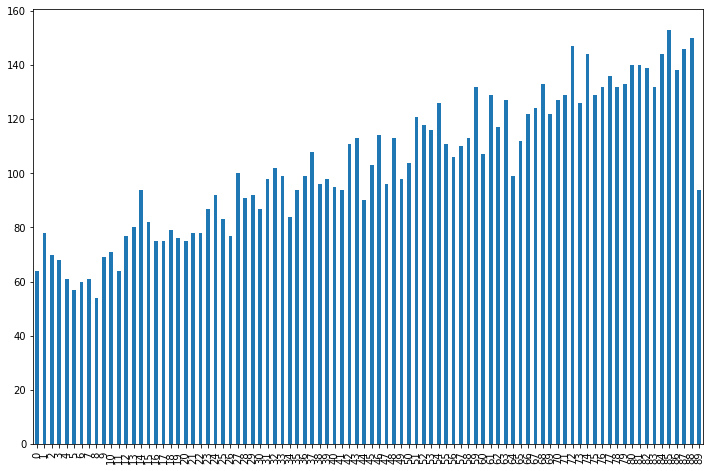

In [79]:
plt.figure(figsize=(12, 8))
user_vs_minute_pivot_NEW.sum(axis=1).plot.bar()